### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [45]:
import pandas as pd
from fbprophet import Prophet

In [46]:
df = pd.read_csv('../../data/cleaned/dayseries_04_18.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(5479,            ds   y
 0  2004-01-01  26
 1  2004-01-02  78
 2  2004-01-03  21
 3  2004-01-04  17
 4  2004-01-05  26,               ds   y
 5474  2018-12-27  25
 5475  2018-12-28  31
 5476  2018-12-29  18
 5477  2018-12-30  18
 5478  2018-12-31  40)

In [47]:
m = Prophet(yearly_seasonality=52) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [48]:
df_act = pd.read_csv('../../data/cleaned/dayseries_19.csv')
pred_len = len(df_act)
future = m.make_future_dataframe(periods=pred_len,freq='D',include_history=True)
future.head(2)

,ds
0,2004-01-01
1,2004-01-02


In [69]:
forecast = m.predict(future)
max(forecast['holidays_upper'])

4.3508927766541845

In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'additive_terms','holidays_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,additive_terms,holidays_upper
5614,2019-05-16,33.362926,22.420538,43.803564,2.201275,0.0
5615,2019-05-17,36.884304,27.122644,46.018564,5.727019,0.0
5616,2019-05-18,31.146127,20.679499,42.082429,-0.006791,0.0
5617,2019-05-19,24.718471,14.867958,34.864479,-6.430080,0.0
5618,2019-05-20,31.814651,21.734044,41.724290,0.670466,0.0


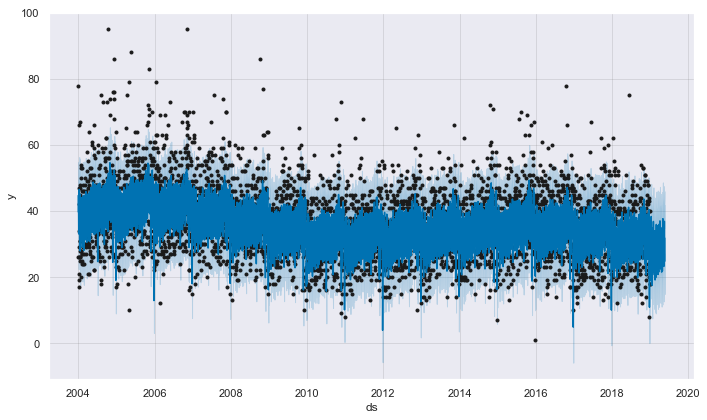

In [51]:
fig1 = m.plot(forecast)

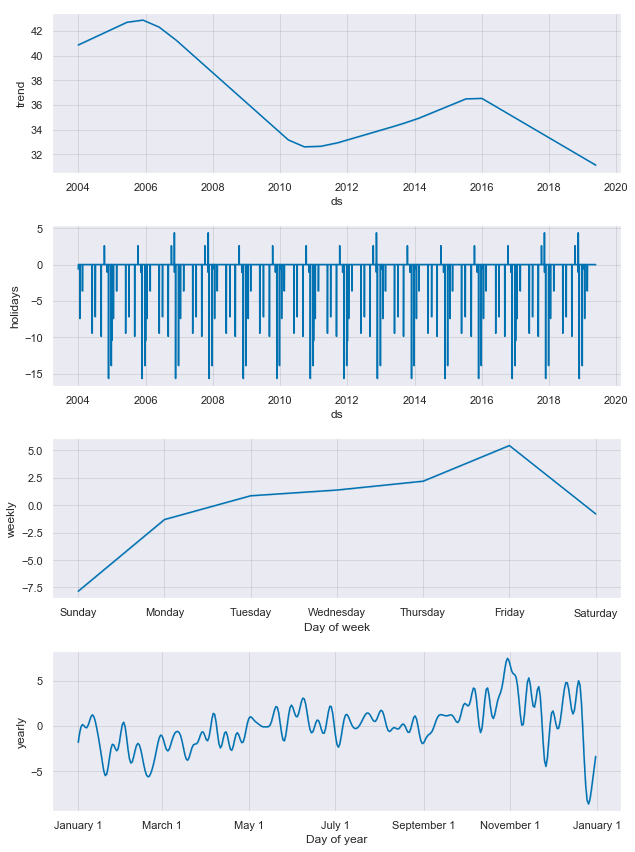

In [52]:
fig2 = m.plot_components(forecast)

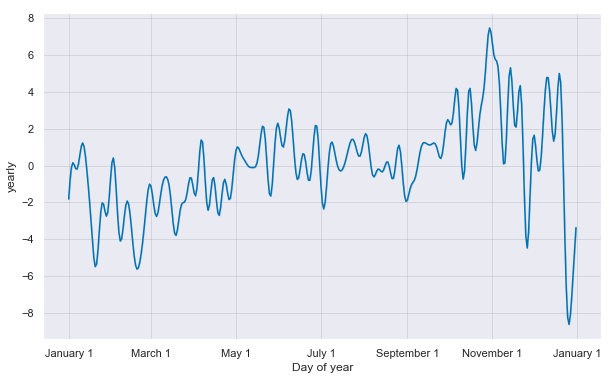

In [54]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [55]:
import matplotlib.pyplot as plt

baseline

In [56]:
y_act_18 = df['y'][-365:]
y_base_19 = [y_act_18.mean()]*pred_len

In [57]:
x = forecast.index.values[-pred_len:]
y = forecast['yhat'][-pred_len:]
y_low = forecast['yhat_lower'][-pred_len:]
y_up = forecast['yhat_upper'][-pred_len:]

len(y)

140

In [58]:
yr = df_act.acc_nr.values[:pred_len]

In [59]:
len(yr)

140

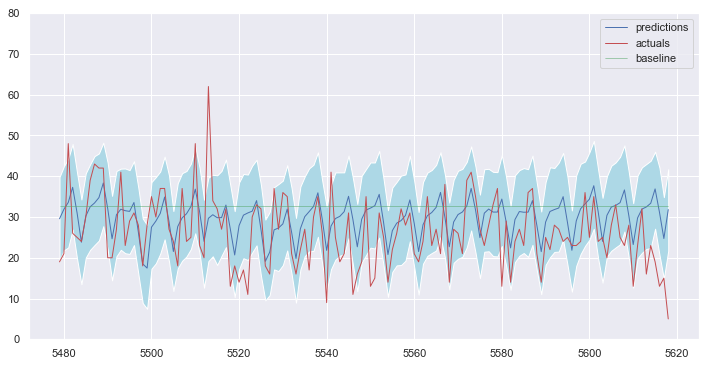

In [68]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b-', label='predictions', lw=1)
# ax.plot(x,y_up, 'b-', label='upper', lw=0.3)
# ax.plot(x,y_low, 'b-', label='lower', lw=0.3)
ax.fill_between(x, y_low, y_up, facecolor='lightblue')
ax.plot(x,yr, 'r-', label='actuals', lw=1)
ax.plot(x,y_base_19, 'g-', label='baseline', lw=0.5)
ax.set_ylim(0,80)
ax.legend()

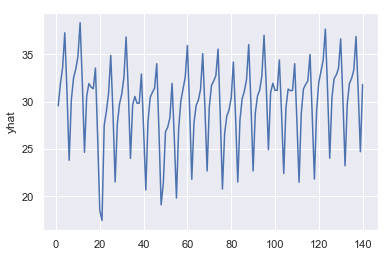

In [67]:
import seaborn as sns; sns.set()
# fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x=range(1,pred_len+1), y="yhat", data= forecast[-pred_len:])
# ax.set_ylim(0,300)

In [62]:
from sklearn.metrics import mean_squared_error
print('MSE to actuals:', mean_squared_error(y,yr))
print('MSE to baseline:', mean_squared_error(y_base_19, yr))

MSE to actuals: 77.93998591095794
MSE to baseline: 118.8377015253465


In [63]:
e_p = [mean_squared_error(y[:i],yr[:i]) for i in range(1,len(yr)+1)]
e_b = [mean_squared_error(y_base_19[:i], yr[:i]) for i in range(1,len(yr)+1)]
bp_ratio = [e_p[i]/e_b[i] for i in range(len(yr))]

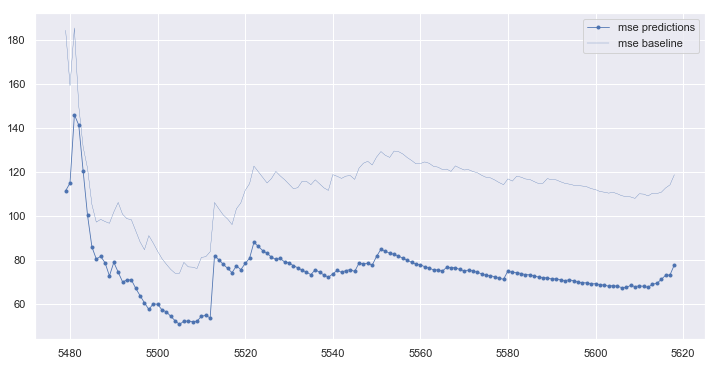

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,e_p, 'b.-', label='mse predictions', lw=0.8)
ax.plot(x,e_b, 'b-', label='mse baseline', lw=0.3)
ax.legend()

In [65]:
# for i in range(1,len(yr)+1):    
#     print('MSE of prediction:', mean_squared_error(y[:i],yr[:i]))
#     print('MSE of baseline:', mean_squared_error(y_base_19[:i], yr[:i]))

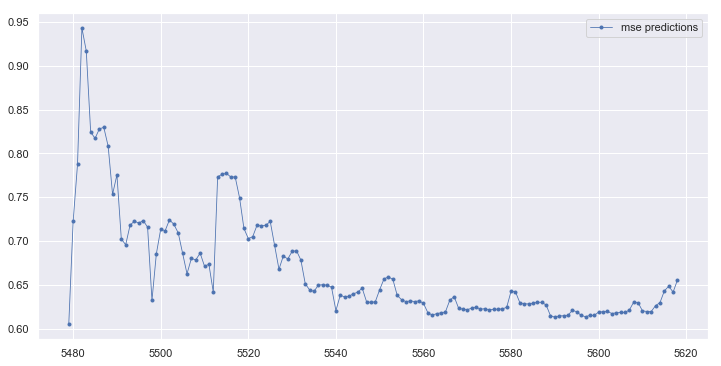

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,bp_ratio, 'b.-', label='mse predictions', lw=0.8)
# ax.plot(x,e_b, 'b-', label='mse baseline', lw=0.3)
ax.legend()

##### Rolling windows

In [179]:
df_act.set_index('ds', inplace=True)

In [180]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [ ]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])